<a href="https://colab.research.google.com/github/ggcat321/Hello/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files, drive
drive.mount("/content/drive")

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from sklearn.model_selection import train_test_split

import keras
from keras.layers import Conv2D, Flatten, MaxPooling2D

%matplotlib inline

#read data
os.chdir(r"/content/drive/MyDrive/")
df_train = pd.read_csv("fashion-mnist_train.csv")
df_test = pd.read_csv("fashion-mnist_test.csv")

xx = np.array(df_train.iloc[:, 1:])
yy = to_categorical(np.array(df_train.iloc[:, 0]))

x_test = np.array(df_test.iloc[:, 1:])
y_test = to_categorical(np.array(df_test.iloc[:, 0]))

Mounted at /content/drive


In [ ]:
#argumentation
e_1 = np.identity(28, dtype=np.int8)[:,::-1]
new_xx = np.zeros((xx.shape[0],784))

for i in range(xx.shape[0]):
  tempt_xx = xx[i].reshape(28,28).dot(e_1).reshape(784,)
  new_xx[i] = tempt_xx

new_yy = yy

nx_train = np.vstack((xx,new_xx))
ny_train = np.vstack((yy,new_yy))

In [ ]:
#split data
tx_train, tx_val, y_train, y_val = train_test_split(nx_train, ny_train, test_size = 0.01)

x_train = tx_train.reshape(tx_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = tx_val.reshape(tx_val.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train -= x_train.mean()
x_test -= x_test.mean()
x_val -= x_val.mean()

x_train /= x_train.std()
x_test /= x_test.std()
x_val /= x_val.std()

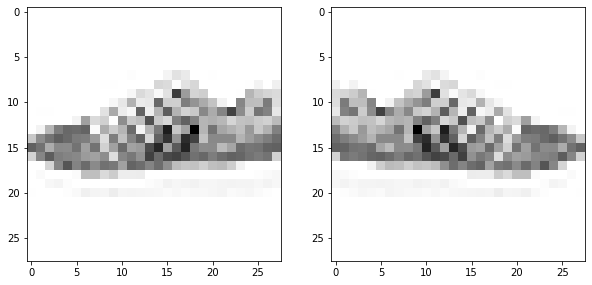

In [ ]:
#plot picture
i = 51110

plt.figure(figsize = (10, 8))
plt.subplot(121)
plt.imshow(xx[i].reshape(28,28), cmap = "Greys")

plt.subplot(122)
plt.imshow(new_xx[i].reshape(28,28), cmap = "Greys")
plt.show()

In [ ]:
model = Sequential()

base_v = 32

model.add(Conv2D(base_v, kernel_size=(3, 3),padding='same',activation='relu',kernel_initializer='lecun_normal',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.01))

model.add(Conv2D(base_v*2, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.02))

model.add(BatchNormalization())
model.add(Conv2D(base_v*4, (3, 3),padding='same',activation='relu'))
model.add(Dropout(0.8))

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [ ]:
#train the model
epochs_v = 150
history = model.fit(x_train, y_train,
          batch_size = int(x_train.shape[0]*0.0336),
          epochs = epochs_v,
          validation_data = (x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/150
30/30 [==============================] - 19s 281ms/step - loss: 0.7150 - accuracy: 0.7473 - val_loss: 0.8906 - val_accuracy: 0.6317
Epoch 2/150
30/30 [==============================] - 9s 318ms/step - loss: 0.4164 - accuracy: 0.8500 - val_loss: 0.6137 - val_accuracy: 0.7958
Epoch 3/150
30/30 [==============================] - 8s 266ms/step - loss: 0.3635 - accuracy: 0.8686 - val_loss: 0.5463 - val_accuracy: 0.8133
Epoch 4/150
30/30 [==============================] - 8s 286ms/step - loss: 0.3340 - accuracy: 0.8782 - val_loss: 0.5199 - val_accuracy: 0.8092
Epoch 5/150
30/30 [==============================] - 8s 269ms/step - loss: 0.3110 - accuracy: 0.8870 - val_loss: 0.4453 - val_accuracy: 0.8367
Epoch 6/150
30/30 [==============================] - 10s 353ms/step - loss: 0.2934 - accuracy: 0.8939 - val_loss: 0.4336 - val_accuracy: 0.8325
Epoch 7/150
30/30 [==============================] - 10s 329ms/step - loss: 0.2782 - accuracy: 0.8979 - val_loss: 0.3817 - val_accuracy: 0.8

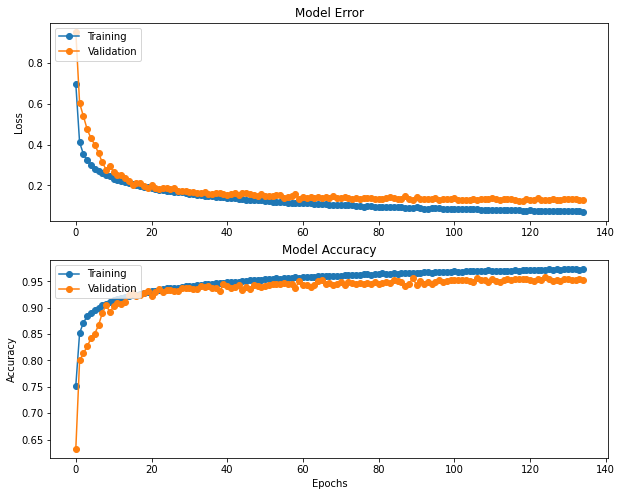


Test loss :  0.1743
Test accuracy :  0.9492
Highest :  0.9575


In [ ]:
#evaluate the model
pltstart_v = 0

plt.figure(figsize = (10, 8))
plt.subplot(211)

plt.plot(history.history["loss"][pltstart_v:], "-o")
plt.plot(history.history["val_loss"][pltstart_v:], "-o")
plt.title("Model Error")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"], loc = "upper left")
#plt.xlim([pltstart_v, epochs_v])

plt.subplot(212)

plt.plot(history.history["accuracy"][pltstart_v:], "-o")
plt.plot(history.history["val_accuracy"][pltstart_v:], "-o")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Training", "Validation"], loc = "upper left")
#plt.xlim([pltstart_v, epochs_v])
plt.show()

print("")
print('Test loss : ', round(score[0],4))
print('Test accuracy : ', round(score[1],4))
print('Highest : ', round(max(history.history["val_accuracy"]),4))

In [ ]:
#save file
pre_v = model.predict(x_test)
classes_x = np.argmax(pre_v,axis=1)
lis = np.asarray(list(range(0,10000,1)))
final_o = pd.DataFrame({"imageID" : lis, "label" : classes_x})
final_o.to_csv("110258032.csv", index = None)
files.download("110258032.csv")

313/313 [==============================] - 2s 5ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#0.0340 > 0.9448 0.9464
#0.0340 > 0.9443 0.9446 *
#0.0338 > 0.9428 0.9418
#0.0336 > 0.9473 0.9464
#0.0330 > 0.9462 0.9462
#0.0328 > 0.9450 0.9440
#0.0332 > 0.9443 0.9438
#0.0344 > 0.9442 0.9410
#0.0336 > 0.9492 0.9490 :)))

In [ ]:
#public 0.9310
"""
tx_train, tx_val, y_train, y_val = train_test_split(xx, yy, test_size = 0.125)

x_train = tx_train.reshape(tx_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = tx_val.reshape(tx_val.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train -= x_train.mean()
x_test -=x_test.mean()
x_val -= x_val.mean()

x_train /= x_train.std()
x_test /= x_test.std()
x_val /= x_val.std()



model = Sequential()

base_v = 32

model.add(Conv2D(base_v, kernel_size=(3, 3),activation='relu',kernel_initializer='lecun_normal',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.16))

model.add(Conv2D(base_v*2, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.23))

model.add(Conv2D(base_v*4, (3, 3), activation='relu'))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.12))

model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.12))

model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.12))

model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
model.summary()

epochs_v = 99
history = model.fit(x_train, y_train,
          batch_size = 1575,
          epochs = epochs_v,
          validation_data = (x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
"""

In [ ]:
#0.9380
"""
tx_train, tx_val, y_train, y_val = train_test_split(xx, yy, test_size = 0.05)

x_train = tx_train.reshape(tx_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = tx_val.reshape(tx_val.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train -= x_train.mean()
x_test -=x_test.mean()
x_val -= x_val.mean()

x_train /= x_train.std()
x_test /= x_test.std()
x_val /= x_val.std()

model = Sequential()

base_v = 32

model.add(Conv2D(base_v, kernel_size=(3, 3),padding='same',activation='relu',kernel_initializer='lecun_normal',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.16))

model.add(Conv2D(base_v*2, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.23))

model.add(Conv2D(base_v*4, (3, 3),padding='same',activation='relu'))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.12))

model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.12))

model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.12))

model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
model.summary()


epochs_v = 50
history = model.fit(x_train, y_train,
          batch_size = int(x_train.shape[0]*0.032),
          epochs = epochs_v,
          validation_data = (x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
"""

In [ ]:
#0.943
"""

#rotate for more data
type(xx[i])
e_1 = np.identity(28, dtype=np.int8)[:,::-1]
new_xx = np.zeros((xx.shape[0],784))

for i in range(xx.shape[0]):
  tempt_xx = xx[i].reshape(28,28).dot(e_1).reshape(784,)
  new_xx[i] = tempt_xx

new_yy = yy

nx_train = np.vstack((xx,new_xx))
ny_train = np.vstack((yy,new_yy))


#split
tx_train, tx_val, y_train, y_val = train_test_split(xx, yy, test_size = 0.01)

x_train = tx_train.reshape(tx_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = tx_val.reshape(tx_val.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train -= x_train.mean()
x_test -=x_test.mean()
x_val -= x_val.mean()

x_train /= x_train.std()
x_test /= x_test.std()
x_val /= x_val.std()

#train
model = Sequential()

base_v = 32

model.add(Conv2D(base_v, kernel_size=(3, 3),padding='same',activation='relu',kernel_initializer='lecun_normal',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(base_v*2, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(base_v*4, (3, 3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
model.summary()



epochs_v = 75
history = model.fit(x_train, y_train,
          batch_size = int(x_train.shape[0]*0.034),
          epochs = epochs_v,
          validation_data = (x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
"""


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 64)         